# BioE131 Lab 2 | Connor Tou

### Generating a Phylogentic Tree

To generate a multiple sequence alignment (MSA), the following command was used:
```
muscle –in seqs.fa –out seqs.aligned.fa
```

The following was printed in the terminal:
```
MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

seqs 48 seqs, max length 2217, avg  length 2209
00:00:01     11 MB(1%)  Iter   1  100.00%  K-mer dist pass 1
00:00:01     11 MB(1%)  Iter   1  100.00%  K-mer dist pass 2
00:00:04     83 MB(5%)  Iter   1  100.00%  Align node
00:00:04     83 MB(5%)  Iter   1  100.00%  Root alignment
00:00:06     83 MB(5%)  Iter   2  100.00%  Refine tree
00:00:06     83 MB(5%)  Iter   2  100.00%  Root alignment
00:00:06     83 MB(5%)  Iter   2  100.00%  Root alignment
00:00:12     83 MB(5%)  Iter   3  100.00%  Refine biparts
00:00:19     83 MB(5%)  Iter   4  100.00%  Refine biparts
00:00:19     83 MB(5%)  Iter   5  100.00%  Refine biparts
00:00:19     83 MB(5%)  Iter   5  100.00%  Refine biparts
```

Comparing the input and output of the command - 
**Here is the input: [seqs.fa](https://github.com/connortou/BioE131/blob/master/seqs%20(1).fa) and here is the output: [seqs.aligned.fa](https://github.com/connortou/BioE131/blob/master/seqs.aligned.fa).** The seqs.aligned.fa file contains the MSA - all sequences are of the same length here (unlike the original seqs.fa file). The seqs.aligned.fa file is also somewhat sorted into similarly aligned sequences of different clusters. 

Now using Morgan Price's Fasttree tool using the command in order to generate a newick-format tree from the MSA:
```
fasttree -nt < seqs.aligned.fa > tree.nwk
```

Which gives: 
```
FastTree Version 2.1.11 Double precision (No SSE3)
Alignment: standard input
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.03 seconds
Refining topology: 22 rounds ME-NNIs, 2 rounds ME-SPRs, 11 rounds ML-NNIs
Total branch-length 0.954 after 0.45 sec2, 1 of 46 splits
ML-NNI round 1: LogLk = -15605.734 NNIs 8 max delta 16.63 Time 0.71
Switched to using 20 rate categories (CAT approximation)1 of 20
Rate categories were divided by 0.741 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -14232.579 NNIs 0 max delta 0.00 Time 0.86
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -14232.478 NNIs 0 max delta 0.00 Time 1.04 (final)
Optimize all lengths: LogLk = -14232.478 Time 1.09
Total time: 1.41 seconds Unique: 48/48 Bad splits: 0/45
```
**See below for the resulting newick tree:**

In [6]:
from Bio import Phylo

# Draw the Newick Tree
tree = Phylo.read('tree.nwk', 'newick')
tree.ladderize() 
Phylo.draw_ascii(tree, file=None, column_width =50)

 , rh.50
 |
 , rh.52
 |
 | hu.39
 |
_, rh.53
 |
 , rh.49
 |
 , rh.57
 |
 | rh.51
 |
 , rh.64
 |
 , rh.61
 |
 , rh.58
 |
 |                 , pi.2
 |      ___________|
 |     |           , pi.3
 |     |           |
 |     |           | pi.1
 |     |
 |     |     , hu.17
 |    _|     |
 |   | |     | hu.6
 |   | | ____|
 |   | ||    |, rh.10
 |   | ||    ||
 |   | ||     , bb.1
 |   | ||     |
 |   |  |     | bb.2
 |   |  |
 |   |  |  ____ rh.2
 |   |  | |
 |   |  |_|      _ rh.40
 |   |    |     |
 |   |    |_____, hu.67
 |   |          |
 |   |          , hu.37
 |   |          |
 |___|          , hu.40
     |          |
     |          | hu.66
     |          |
     |          , hu.42
     |          |
     |          |, hu.41
     |          ||
     |           | rh.38
     |
     |      _______ rh.43
     |   __|
     |  |  |                        , hu.14
     |  |  |________________________|
     |  |                           | , hu.31
     |  |                           |_|
     

### Identifying Sequences by Blast
These clusters were picked somewhat arbitrarily, but out of intuition of visually obvious clusters. Other clusters may be used (as long as they are monophyletic). 
* cluster1 = 'hu.31', 'hu.32', 'hu.14'
* cluster2 = 'hu.44', 'hu.46', 'hu.43', 'hu.48'
* cluster3 = 'pi.3', 'pi.1', 'pi.2'
* cluster4 = 'rh.43'
* cluster5 = 'rh.58', 'rh.57', 'hu.39', 'rh.49', 'rh.51', 'rh.61', 'rh.52', 'rh.50', 'rh.53', 'rh.64'
* cluster6 = 'bb.1', 'bb.2', 'rh.10', 'hu.17', 'hu.6'
* cluster7 = 'rh.2', 'rh.40', 'hu.41', 'rh.38', 'hu.66', 'hu.67', 'hu.42', 'hu.37', 'hu.40'
* cluster8 = 'cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62'
* cluster9 = 'rh.35', 'rh.36', 'rh.37'
* cluster10 = 'cy.4', 'cy.6', 'cy.3', 'cy.5', 'rh.13'

For each cluster, and picking the first subject, the _BLAST_ results give:
* **hu.31** is _Adeno-associated virus isolate hu.31 capsid protein VP1 (cap) gene, complete cds_
* **hu.44** is _Adeno-associated virus isolate hu.44 capsid protein VP1 (cap) gene, complete cds_
* **pi.3** is _Adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene, complete cds_
* **rh.43** is _Adeno-associated virus isolate rh.43 capsid protein VP1 (cap) gene, complete cds_
* **rh.58** is _Adeno-associated virus isolate rh.58 capsid protein VP1 (cap) gene, complete cds_
* **bb.1** is _Non-human primate Adeno-associated virus isolate AAVbb.1 capsid protein (VP1) gene, complete cds_
* **rh.2** is _Non-human primate Adeno-associated virus isolate AAVrh.2 capsid protein (VP1) gene, complete cds_
* **cy.2** is _Non-human primate Adeno-associated virus isolate AAVcy.2 capsid protein (VP1) gene, complete cds_
* **rh.35** is _Non-human primate Adeno-associated virus isolate AAVrh.35 capsid protein (VP1) gene, complete cds_
* **cy.4** is _Non-human primate Adeno-associated virus isolate AAVcy.4 capsid protein (VP1) gene, complete cds_

**Printing the selected representative gives the following sequences:**

In [7]:
from Bio import SeqIO

for record in SeqIO.parse("seqs.fa", "fasta"):
    ID = record.id
    if (ID == "hu.31" or ID == "hu.44" or ID == "pi.3" or ID == "rh.43" or ID =="rh.58"
       or ID == "bb.1" or ID == "rh.2" or ID == "cy.2" or ID == "rh.35" or ID == "cy.4"):
        print(ID)
        print(record.seq)

bb.1
atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggcgctgaaacctggagccccgaagcccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcggacgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccatcaccccagcgttctccagactccactacgggcatcggcaagaaaggccagcagcccgcgaaaaagagactcaactttgggcagactggcgactcagagtcagtgcccgaccctcaaccaatcggagaaccccccgcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctccccacctacaacaaccacctctacaagcaaatctccaacgggacttcgggaggaagcaccaacgacaacacctacttcggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagagactcaacttcaagctcttcaacatccaggtcaaggaggtcacgcagaatgaaggcac

### QUESTIONS
**What are some of the most common matches for each cluster?**
* adeno-associated virus isolate capsid protein VP1 (cap) gene

**Do they all match the same gene? Are there any that definitely do not match the others?**
* Yes, they all match adeno-associated virus isolate capsid protein  VP1 (cap) gene. None do not definitely not match the others; however, bb.1, rh.2, cy.2, rh.35, cy.4 specify _non-human primate_ in their annotation. 

**Why might we not trust the annotations for sequences that come up in our BLAST?**
* The inputter of the original proposed reference sequence name may not have had sufficient data/analysis methods to determine the given annotations (contained in the description) accurately (i.e. supporting evidence is not given to confirm - or may not be sufficient to confirm - annotations for some sequences)


### Calculating Sequences Statistics for Each Cluster

**FUNCTION:** creates a stacked bar plot for a given cluster and returns an array of cluster sequence lengths which will be used to create a boxplot to visualize intracluster sequence length variation.

In [2]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Phylo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def Calc_ClusterFrac(cluster, graphTitle, aligned, unaligned, pos_in_seq): #aligned/unaligned is a list after parsing
    seq_lengths = []
    cluster_len = []
    AT = [0]*pos_in_seq
    GC = [0]*pos_in_seq
    
    for i in range(len(aligned)):
        subject = aligned[i]
        
        #If in the given cluster
        if subject.id in cluster:
            sequence = subject.seq
            
            #AT/GC scan and count
            for pos in range(pos_in_seq):
                if sequence[pos]=='A' or sequence[pos]=='T':
                    AT[pos]+=1
                if sequence[pos]=='G' or sequence[pos]=='C':
                    GC[pos]+=1
        
            #Use the list containing unaligned datapoints to measure length of sequence
            for subject_unaligned in unaligned:
                if subject_unaligned.id == subject.id:
                    seq_unaligned_len = len(subject_unaligned.seq)
                    break
            seq_lengths.append(seq_unaligned_len)
                    
        #If at the end of the file, calculate AT/GC fractions and append sequence lengths
        if i == len(record)-1:
            cluster_len.append(seq_lengths)
        
            # Calculate AT and GC fraction for each position; the length of the cluster is the total # of bp at position j
            AT_fract = [AT[j]/(len(cluster)) for j in range(pos_in_seq)]
            GC_fract = [GC[j]/(len(cluster)) for j in range(pos_in_seq)]
            
            # Make bar plot
            p1 = plt.bar([i for i in range(pos_in_seq)], AT_fract)
            p2 = plt.bar([i for i in range(pos_in_seq)], GC_fract, bottom = AT_fract)
            plt.ylabel('%AT or %GC')
            plt.xlabel('Position in sequence')
            plt.title(graphTitle)
            plt.show()
            
    return cluster_len

* Note that the clusters are user-defined and can be changed (a 10-cluster and commented-out 4-cluster example are given).
* The number of bases into the sequence that you want to compare can be altered with pos_in_seq
#### Here is the code and graphs for the 10-clusters defined above:

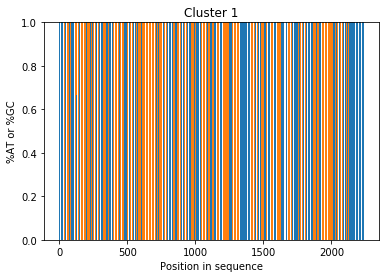

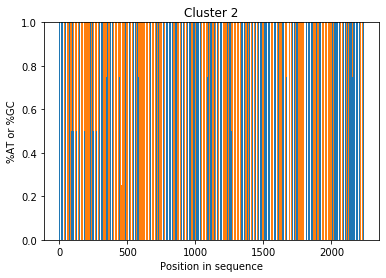

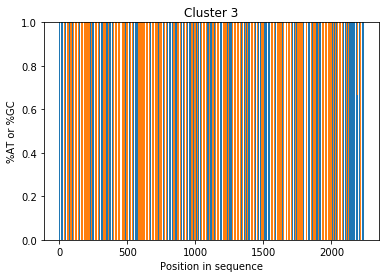

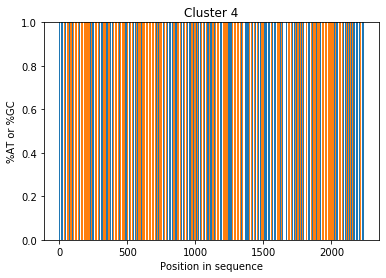

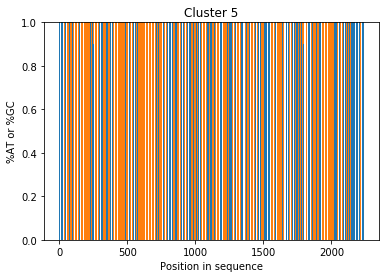

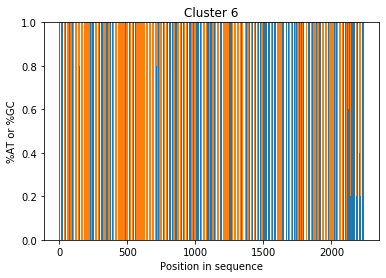

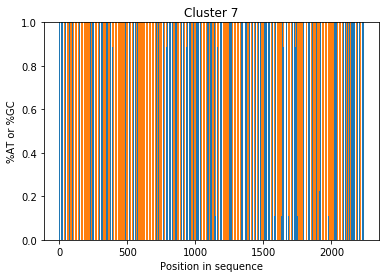

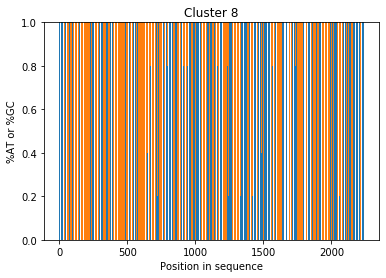

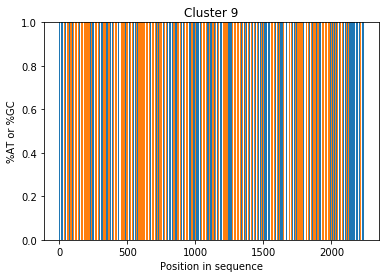

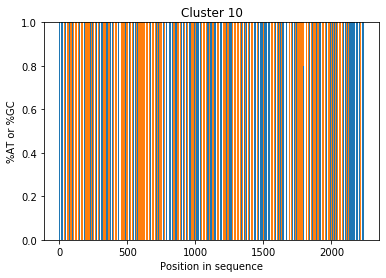

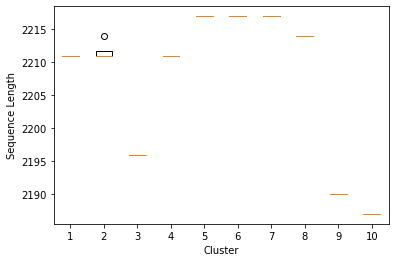

In [3]:
# Be sure to run the function-containing cell first

# Create lists for both aligned and non-aligned specimen sequences. 
aligned =  list(SeqIO.parse('seqs.aligned.fa','fasta'))
record = list(SeqIO.parse('seqs.fa','fasta'))

# Determine how far into the MSA to compare
# CHANGE TO DESIRED LENGTH (WHOLE SEQUENCEin MSA = 2238)
pos_in_seq = 2238

# Define Clusters
cluster1 = ['hu.31', 'hu.32', 'hu.14']
cluster2 = ['hu.44', 'hu.46', 'hu.43', 'hu.48']
cluster3 = ['pi.3', 'pi.1', 'pi.2']
cluster4 = ['rh.43']
cluster5 = ['rh.58', 'rh.57', 'hu.39', 'rh.49', 'rh.51', 'rh.61', 'rh.52', 'rh.50', 'rh.53', 'rh.64']
cluster6 = ['bb.1', 'bb.2', 'rh.10', 'hu.17', 'hu.6']
cluster7 = ['rh.2', 'rh.40', 'hu.41', 'rh.38', 'hu.66', 'hu.67', 'hu.42', 'hu.37', 'hu.40']
cluster8 = ['cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62']
cluster9 = ['rh.35', 'rh.36', 'rh.37']
cluster10 = ['cy.4', 'cy.6', 'cy.3', 'cy.5', 'rh.13']

# Each call creates a stacked bar plot for each user-defined cluster
box1 = Calc_ClusterFrac(cluster1, "Cluster 1", aligned, record, pos_in_seq)
box2 = Calc_ClusterFrac(cluster2, "Cluster 2", aligned, record, pos_in_seq)
box3 = Calc_ClusterFrac(cluster3, "Cluster 3", aligned, record, pos_in_seq)
box4 = Calc_ClusterFrac(cluster4, "Cluster 4", aligned, record, pos_in_seq)
box5 = Calc_ClusterFrac(cluster5, "Cluster 5", aligned, record, pos_in_seq)
box6 = Calc_ClusterFrac(cluster6, "Cluster 6", aligned, record, pos_in_seq)
box7 = Calc_ClusterFrac(cluster7, "Cluster 7", aligned, record, pos_in_seq)
box8 = Calc_ClusterFrac(cluster8, "Cluster 8", aligned, record, pos_in_seq)
box9 = Calc_ClusterFrac(cluster9, "Cluster 9", aligned, record, pos_in_seq)
box10 = Calc_ClusterFrac(cluster10, "Cluster 10", aligned, record, pos_in_seq)##

# Graph Box Plot
Cluster_Box = box1+box2+box3+box4+box5+box6+box7+box8+box9+box10


fig, ax = plt.subplots()
ax.set_xlabel("Cluster")
ax.set_ylabel("Sequence Length")

boxplot_dict = ax.boxplot(Cluster_Box, labels = [str(i+1) for i in range(len(Cluster_Box))])


* The bar plots show AT/GC fraction per base within the sequence alignment for each cluster. Even within these 10-clusters (more narrowly defined than having less and larger clusters), there is noticeable AT-GC variation on a per base basis. 
* The box plot shows intracluster sequence length variation. Only in cluster 2 is length variation observed and contains an outlier (shown by the circle). 

#### As an example of the generalizability of this function, here is code and graphs for 4 clusters as defined in the code (again, arbitrarily defined, but are monophyletic):

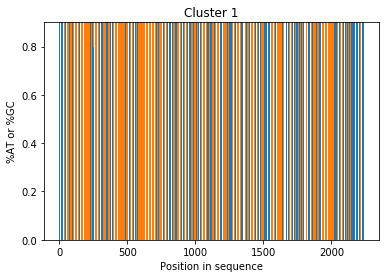

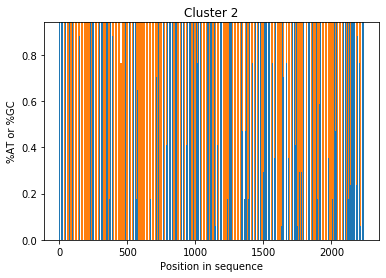

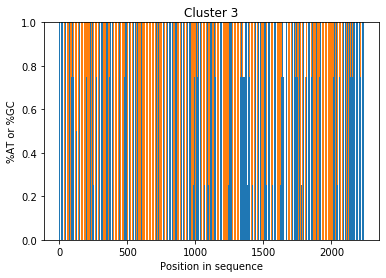

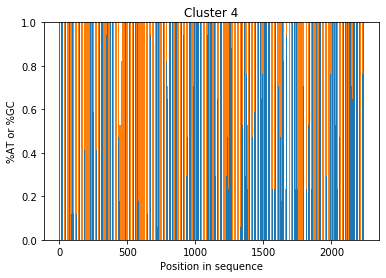

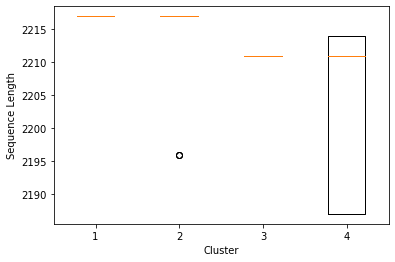

In [9]:
# Be sure to run the function cell first

# Create lists for both aligned and non-aligned specimen sequences. 
aligned =  list(SeqIO.parse('seqs.aligned.fa','fasta'))
record = list(SeqIO.parse('seqs.fa','fasta'))

# Determine how far into the MSA to compare
# CHANGE TO DESIRED LENGTH (WHOLE SEQUENCE in MSA = 2238)
pos_in_seq = 2238

# Define Clusters
cluster1 = ['rh.50', 'rh.52', 'rh.39', 'rh.53', 'rh.49', 'rh.57', 'rh.51', 'rh.64', 'rh.61', 'rh.58']
cluster2 = ['pi.2', 'pi.3', 'pi.1', 'hu.17', 'hu.6', 'rh.10', 'bb.1', 'bb.2', 'rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.42', 'hu.41', 'hu.38']
cluster3 = ['rh.43', 'hu.14', 'hu.31', 'hu.32']
cluster4 = ['hu.43', 'hu.44', 'hu.46', 'hu.48', 'cy.2', 'rh.54', 'rh.55', 'rh.48', 'rh.62', 'rh.35', 'rh.36', 'rh.37', 'cy.3', 'cy.6', 'cy.5', 'cy.4', 'rh.13']

# Run Calc_ClusterFrac and Graph barplots
box1 = Calc_ClusterFrac(cluster1, "Cluster 1", aligned, record, pos_in_seq)
box2 = Calc_ClusterFrac(cluster2, "Cluster 2", aligned, record, pos_in_seq)
box3 = Calc_ClusterFrac(cluster3, "Cluster 3", aligned, record, pos_in_seq)
box4 = Calc_ClusterFrac(cluster4, "Cluster 4", aligned, record, pos_in_seq)

# Graph Box Plot
Cluster_Box = box1+box2+box3+box4

fig, ax = plt.subplots()
ax.set_xlabel("Cluster")
ax.set_ylabel("Sequence Length")

boxplot_dict = ax.boxplot(Cluster_Box, labels = [str(i+1) for i in range(len(Cluster_Box))])

* The box plot shows intracluster sequence length variation. Only in cluster 4 is length variation observed.

## End of Lab 2